In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast      
from collections import Counter
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("data/combined_scraped.csv")
df

,Brand Name,Products,Description,Website
0,0039 Italy,['Womenswear'],When a German label manages to free its blouse...,http://www.0039italy.com
1,05 Studio,"['Swimwear', 'Bodywear']",We do basics that are not boring! 05 Studio ai...,https://www.the05studio.com
2,0711,['Bags'],Brand 0711 was founded in 2012 by Nino Eliava ...,http://0711tbilisi.com
3,10Days,"['Womenswear', 'Menswear', 'Accessories']",10DAYS is an Amsterdam based lifestyle brand t...,https://www.10dayslifestyle.nl
4,11 Degrees,"['Womenswear', 'Menswear', 'Kidswear', 'Access...",Here at 11 Degrees we use higher quality mater...,https://www.11degrees.eu/
...,...,...,...,...
3780,Blue Tomato GmbH,NaN,Blue Tomato is an autrian retailer and e-comme...,NaN
3781,POLO RALPH LAUREN,"['Accessories', 'Bags', 'Eyewear', 'Footwear',...",Ralph Lauren is a US-based designer and retail...,https://www.poloralphlauren.com
3782,Armani,NaN,The Armani Group is a leading company in the f...,http://www.armani.com/
3783,CHANEL,NaN,CHANEL is a private company and a world leader...,http://www.chanel.com/


In [3]:
df2 = pd.read_csv("data/Finaldf.csv").drop("Unnamed: 0", axis=1)
df2

,Brand,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica,Antigua & Barbuda,...,Wallis & Futuna,Western Sahara,Yemen,Zambia,Zimbabwe,Åland Islands,2023 Brand Value in $,Products,Description,Website
0,NIKE,0,0,11,0,0,0,0,0,0,...,0,0,0,0,0,0,$42.5B,['Sportswear'],Our mission is what drives us to do everything...,http://nike.com
1,POLO RALPH LAUREN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,$4.7B,"['Accessories', 'Bags', 'Eyewear', 'Footwear',...",Ralph Lauren is a US-based designer and retail...,https://www.poloralphlauren.com
2,THE NORTH FACE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,$4.6B,"['Womenswear', 'Menswear', 'Accessories']",Founded by husband and wife Douglas and Susie ...,https://www.thenorthface.com
3,LOUIS VUITTON,0,0,23,0,0,0,0,0,0,...,0,0,0,0,0,0,$36.4B,"['Womenswear', 'Menswear', 'Accessories']",LOUIS VUITTON ist seit über 160 Jahren eine de...,http://www.louisvuitton.com
4,UNIQLO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,$9.4B,NaN,Uniqlo is a modern Japanese company that inspi...,http://www.uniqlo.com/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,TAG HEUER,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,$645M,NaN,TAG Heuer is a watch company founded in 1860 b...,http://www.tagheuer.com/
90,BANANA REPUBLIC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,$640M,"['Womenswear', 'Menswear', 'Kidswear', 'Footwe...",Banana Republic is a clothing and accessories ...,https://www.bananarepublic.eu
91,DESIGUAL,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,$627M,"['Womenswear', 'Menswear', 'Kidswear', 'Sports...","Thomas Meyer created Desigual in 1984, in the ...",http://www.desigual.com
92,CAVALLI,0,23,2,0,0,0,0,0,0,...,0,0,0,0,0,0,$622M,"['Womenswear', 'Menswear', 'Kidswear', 'Footwe...","Founded in 1970, Roberto Cavalli is an Italian...",https://robertocavalli.com


In [46]:
print(df2["Products"].isna().sum())


43


In [5]:
df2["Products"] = df2["Products"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df2["Product_Count"] = df2["Products"].apply(lambda x: len(x) if isinstance(x, list) else 0)


In [6]:
df["Products"] = df["Products"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [7]:
'''
all_products = []

# Iterate over each sublist in the Products column
for sublist in df2["Products"]:
    # Check if the sublist is a valid list
    if isinstance(sublist, list):
        # Iterate over each product in the sublist
        for product in sublist:
            all_products.append(product)
'''

'\nall_products = []\n\n# Iterate over each sublist in the Products column\nfor sublist in df2["Products"]:\n    # Check if the sublist is a valid list\n    if isinstance(sublist, list):\n        # Iterate over each product in the sublist\n        for product in sublist:\n            all_products.append(product)\n'

In [8]:
# Flatten the data
all_products = [product for sublist in df2["Products"] if isinstance(sublist, list) for product in sublist]
scraped_products = [product for sublist in df["Products"] if isinstance(sublist, list) for product in sublist]

In [9]:
len(all_products) == df2.Product_Count.sum()

True

In [10]:
product_count = Counter(all_products)
product_count

scraped_count = Counter(scraped_products)

C:\Users\tedoc\AppData\Local\Temp\ipykernel_4932\2469358261.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product", y="Count", data=pd.DataFrame(product_count.items(), columns=["Product", "Count"]), palette="viridis")


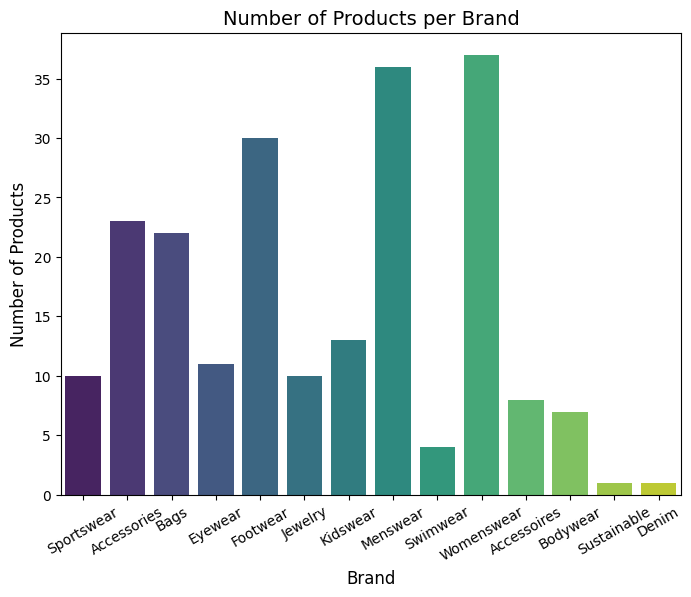

In [11]:
# Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x="Product", y="Count", data=pd.DataFrame(product_count.items(), columns=["Product", "Count"]), palette="viridis")
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Number of Products", fontsize=12)
plt.xticks(rotation=30)
plt.title("Number of Products per Brand", fontsize=14)
plt.show()

C:\Users\tedoc\AppData\Local\Temp\ipykernel_4932\2667318426.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product", y="Count", data=pd.DataFrame(scraped_count.items(), columns=["Product", "Count"]), palette="viridis")


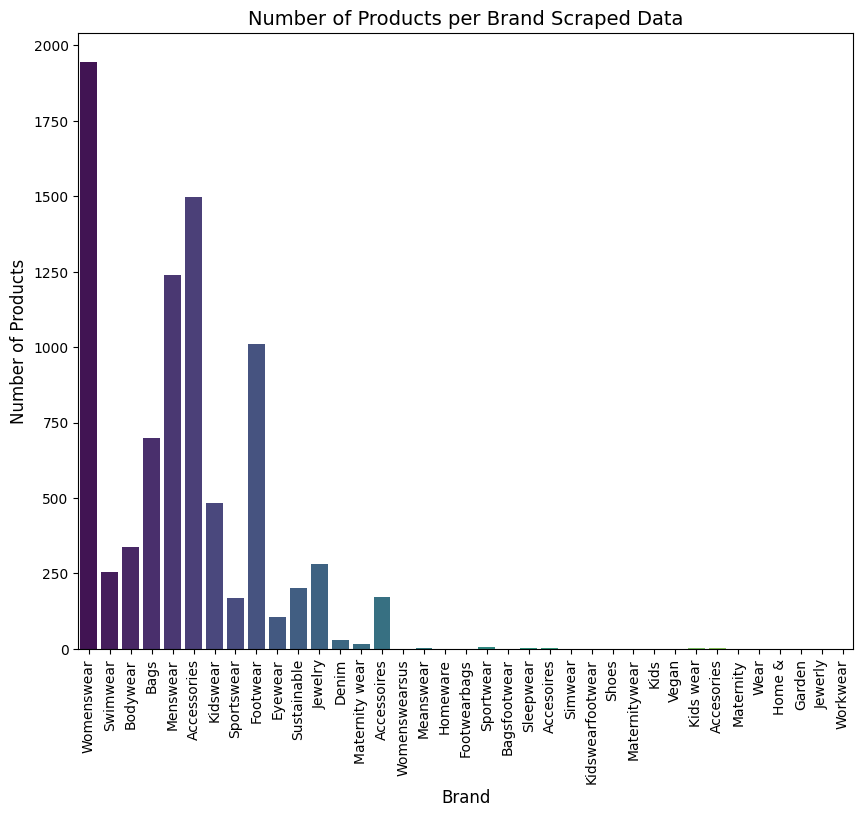

In [12]:
# Plot using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x="Product", y="Count", data=pd.DataFrame(scraped_count.items(), columns=["Product", "Count"]), palette="viridis")
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Number of Products", fontsize=12)
plt.xticks(rotation=90)
plt.title("Number of Products per Brand Scraped Data", fontsize=14)
plt.show()

## Fixing the Proudct sparcity (typos, combining some, so we dont have such unbalanced data)

In [13]:
for _, row in df2.iterrows():
    if isinstance(row["Products"], list):
        if "Denim" in row["Products"]:
            print(row["Brand"])

DOLCE & GABBANA


Downsacling the Products 

In [14]:
# womenswearsus to womensware
df[df["Brand Name"] == "AFRIEK"]["Products"].values[0].append("Womenswear")
df[df["Brand Name"] == "AFRIEK"]["Products"].values[0].remove("Womenswearsus")

In [15]:
df[df["Brand Name"] == "AFRIEK"]

,Brand Name,Products,Description,Website
69,AFRIEK,[Womenswear],AFRIEK has grown into a transnational collecti...,https://afriek.com


In [16]:
# meanswear to menswear
df[df["Brand Name"] == "Allbirds"]["Products"].values[0].append("Menswear")
df[df["Brand Name"] == "Allbirds"]["Products"].values[0].remove("Meanswear")

df[df["Brand Name"] == "Audio Architect Apparel"]["Products"].values[0].append("Menswear")
df[df["Brand Name"] == "Audio Architect Apparel"]["Products"].values[0].remove("Meanswear")

df[df["Brand Name"] == "Allbirds"]
df[df["Brand Name"] == "Audio Architect Apparel"]

,Brand Name,Products,Description,Website
264,Audio Architect Apparel,"[Womenswear, Footwear, Accessories, Menswear]",Audio Architect Apparel was founded in 2015 fo...,https://www.audioarchitect.co


In [17]:
# Remove Homeware
df[df["Brand Name"] == "ANNA+NINA"]["Products"].values[0].remove("Homeware")
df[df["Brand Name"] == "BALR."]["Products"].values[0].remove("Footwearbags")
df[df["Brand Name"] == "SAS BONTON"]["Products"].values[0].remove("Bagsfootwear")
df[df["Brand Name"] == "bruno banani"]["Products"].values[0].remove("Sleepwear")
df[df["Brand Name"] == "Savage X Fenty"]["Products"].values[0].remove("Sleepwear")


In [18]:
# Change from Sportwear to Sportswear
for _, row in df.iterrows():
    if isinstance(row["Products"], list):
        if "Sportwear" in row["Products"]:
            df[df["Brand Name"] == row["Brand Name"]]["Products"].values[0].append("Sportswear")
            df[df["Brand Name"] == row["Brand Name"]]["Products"].values[0].remove("Sportwear")    

In [19]:
# Fix Accessories
df[df["Brand Name"] == "Cosmogonie Paris"]["Products"].values[0].append("Accessories")
df[df["Brand Name"] == "Cosmogonie Paris"]["Products"].values[0].remove("Accesoires")

df[df["Brand Name"] == "HANS PLOENES GmbH"]["Products"].values[0].append("Accessories")
df[df["Brand Name"] == "HANS PLOENES GmbH"]["Products"].values[0].remove("Accesoires")

In [20]:
# Fix Swimwear
df[df["Brand Name"] == "FRED SEGAL"]["Products"].values[0].append("Swimwear")
df[df["Brand Name"] == "FRED SEGAL"]["Products"].values[0].remove("Simwear")

In [21]:
# Fix Kidswear, footwear
df[df["Brand Name"] == "Fusalp"]["Products"].values[0].append("Kidswear")
df[df["Brand Name"] == "Fusalp"]["Products"].values[0].append("Footwear")

df[df["Brand Name"] == "Fusalp"]["Products"].values[0].remove("Kidswearfootwear")

In [22]:
# Fix Shoes
df[df["Brand Name"] == "GRETCHEN"]["Products"].values[0].append("Footwear")
df[df["Brand Name"] == "GRETCHEN"]["Products"].values[0].remove("Shoes")

In [23]:
# Fix Maternity wear
df[df["Brand Name"] == "ITEM m6"]["Products"].values[0].append("Maternity wear")
df[df["Brand Name"] == "ITEM m6"]["Products"].values[0].remove("Maternitywear")

In [24]:
# Fix Kidswear
df[df["Brand Name"] == "Jochie International BV"]["Products"].values[0].append("Kidswear")
df[df["Brand Name"] == "Jochie International BV"]["Products"].values[0].remove("Kids")

In [25]:
# Fix Kidswear
df[df["Brand Name"] == "Marc Jacobs"]["Products"].values[0].append("Kidswear")
df[df["Brand Name"] == "Marc Jacobs"]["Products"].values[0].remove("Kids wear")

df[df["Brand Name"] == "Marinepool"]["Products"].values[0].append("Kidswear")
df[df["Brand Name"] == "Marinepool"]["Products"].values[0].remove("Kids wear")

In [26]:
# Vegan to Sustainability

df[df["Brand Name"] == "LaBante"]["Products"].values[0].remove("Vegan")
df[df["Brand Name"] == "LaBante"]["Products"].values[0].append("Sustainable")

In [27]:
df[df["Brand Name"] == "MERSOR"]["Products"].values[0].append("Accessories")
df[df["Brand Name"] == "MERSOR"]["Products"].values[0].remove("Accesories")

df[df["Brand Name"] == "Nanga"]["Products"].values[0].append("Accessories")
df[df["Brand Name"] == "Nanga"]["Products"].values[0].remove("Accesories")

In [28]:
df[df["Brand Name"] == "Nove"]["Products"].values[0].append("Maternity wear")
df[df["Brand Name"] == "Nove"]["Products"].values[0].remove("Maternity")
df[df["Brand Name"] == "Nove"]["Products"].values[0].remove("Wear")

In [38]:
# Fix Home and Garden
df[df["Brand Name"] == "Pip Studio"]["Products"].values[0].append("Accessories")
df[df["Brand Name"] == "Pip Studio"]["Products"].values[0].remove("Home &")
df[df["Brand Name"] == "Pip Studio"]["Products"].values[0].remove("Garden")


ValueError: list.remove(x): x not in list

In [30]:
# Fix Jerwrly
df[df["Brand Name"] == "Quiksilver"]["Products"].values[0].append("Jewelry")
df[df["Brand Name"] == "Quiksilver"]["Products"].values[0].remove("Jewerly")

In [31]:
# Change from Accessoires to Accessories
for _, row in df.iterrows():
    if isinstance(row["Products"], list):
        if "Accessoires" in row["Products"]:
            try:
                df[df["Brand Name"] == row["Brand Name"]]["Products"].values[0].append("Accessories")
                df[df["Brand Name"] == row["Brand Name"]]["Products"].values[0].remove("Accessoires")
            except:
                print(row["Brand Name"])
                continue

Osprey Europe


In [32]:
df[df["Brand Name"] == "Osprey Europe"]["Products"].values[0].remove("Accessories")

In [33]:
df.drop(2631, axis=0, inplace=True)

In [34]:
df[df["Brand Name"] == "Osprey Europe"]

,Brand Name,Products,Description,Website
2630,Osprey Europe,"[Bags, Accessories]","Founded in 1974 and based in Cortez, Colorado,...",http://www.ospreyeurope.com


In [35]:
scraped_products = [product for sublist in df["Products"] if isinstance(sublist, list) for product in sublist]
scraped_count = Counter(scraped_products)

In [50]:
df["Products"].isna().sum() / len(df)

0.029334038054968287

C:\Users\tedoc\AppData\Local\Temp\ipykernel_4932\2667318426.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product", y="Count", data=pd.DataFrame(scraped_count.items(), columns=["Product", "Count"]), palette="viridis")


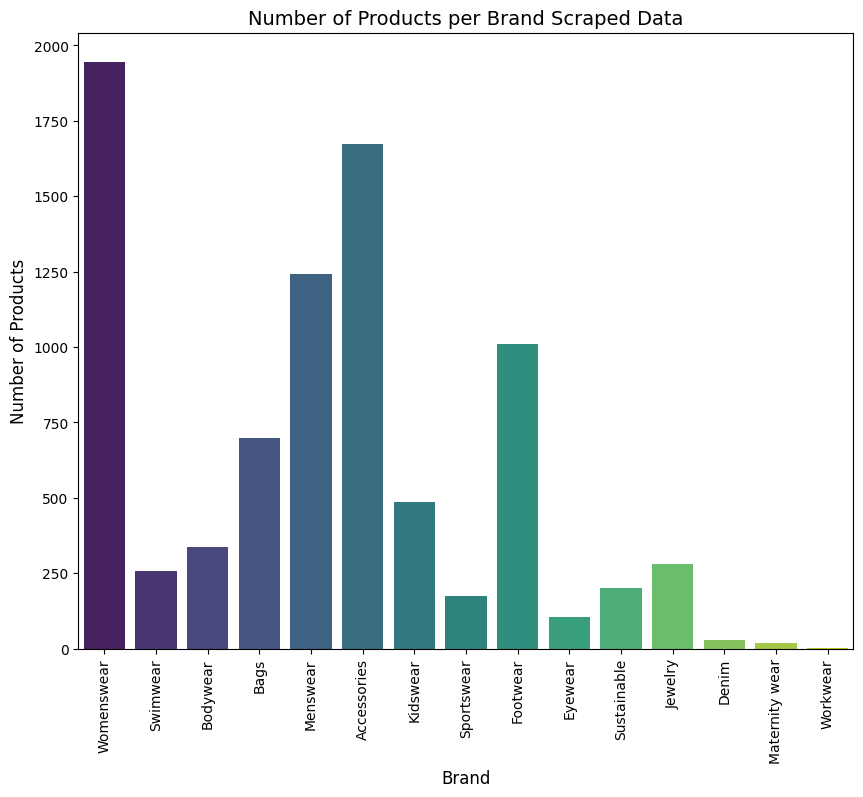

In [36]:
# Plot using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x="Product", y="Count", data=pd.DataFrame(scraped_count.items(), columns=["Product", "Count"]), palette="viridis")
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Number of Products", fontsize=12)
plt.xticks(rotation=90)
plt.title("Number of Products per Brand Scraped Data", fontsize=14)
plt.show()

In [37]:
df["Description"] = "BRAND: " + df["Brand Name"] + " DESCRIPTION: " + df["Description"]
df

,Brand Name,Products,Description,Website
0,0039 Italy,[Womenswear],BRAND: 0039 Italy DESCRIPTION: When a German l...,http://www.0039italy.com
1,05 Studio,"[Swimwear, Bodywear]",BRAND: 05 Studio DESCRIPTION: We do basics tha...,https://www.the05studio.com
2,0711,[Bags],BRAND: 0711 DESCRIPTION: Brand 0711 was founde...,http://0711tbilisi.com
3,10Days,"[Womenswear, Menswear, Accessories]",BRAND: 10Days DESCRIPTION: 10DAYS is an Amster...,https://www.10dayslifestyle.nl
4,11 Degrees,"[Womenswear, Menswear, Kidswear, Accessories]",BRAND: 11 Degrees DESCRIPTION: Here at 11 Degr...,https://www.11degrees.eu/
...,...,...,...,...
3780,Blue Tomato GmbH,NaN,BRAND: Blue Tomato GmbH DESCRIPTION: Blue Toma...,NaN
3781,POLO RALPH LAUREN,"[Accessories, Bags, Eyewear, Footwear, Jewelry...",BRAND: POLO RALPH LAUREN DESCRIPTION: Ralph La...,https://www.poloralphlauren.com
3782,Armani,NaN,BRAND: Armani DESCRIPTION: The Armani Group is...,http://www.armani.com/
3783,CHANEL,NaN,BRAND: CHANEL DESCRIPTION: CHANEL is a private...,http://www.chanel.com/


In [41]:
df.to_csv("data/EdditScrapedData.csv", index=False)

### EDA

<Axes: >

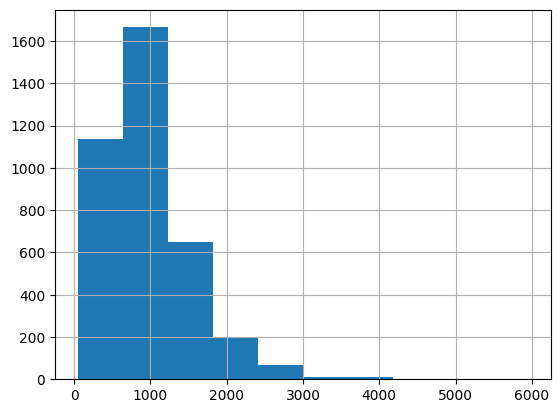

In [58]:
df.Description.str.len().hist()

In [59]:
df_notna = df[~df["Products"].isna()]
df_NA_description = df[df['Description'].isna()]
df_na = df[df["Products"].isna()]

df.dropna(subset=['Description'], inplace=True)

In [62]:
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tedoc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
corpus=[]
new= df['Description'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

<Axes: >

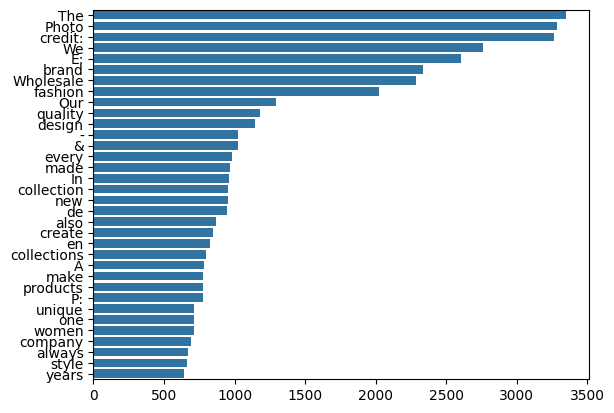

In [64]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:80]:
    if (word not in stop and word != "BRAND:" and word != "DESCRIPTION:"):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

In [65]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tedoc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [66]:
sia = SentimentIntensityAnalyzer()
# Step 3: Perform Sentiment Analysis
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores

In [67]:

df["Sentiment_Scores"] = df["Description"].apply(analyze_sentiment)
# Extract compound score for overall sentiment
df["Compound"] = df["Sentiment_Scores"].apply(lambda x: x['compound'])

# Step 4: Categorize Sentiments
def categorize_sentiment(compound_score):
    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Compound"].apply(categorize_sentiment)


Text(0.5, 1.0, 'Sentiment Analysis')

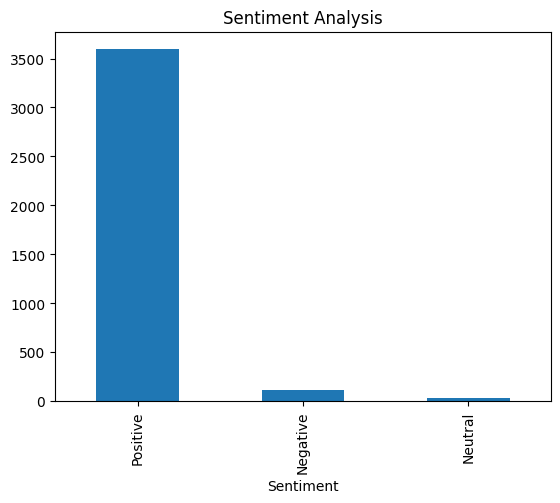

In [71]:
df["Sentiment"].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")

In [68]:
df[df.Sentiment == "Negative"] 

,Brand Name,Products,Description,Website,Sentiment_Scores,Compound,Sentiment
24,4th & Reckless,"[Footwear, Womenswear]",BRAND: 4th & Reckless DESCRIPTION: 4th & Reckl...,https://www.4thandreckless.com,"{'neg': 0.166, 'neu': 0.755, 'pos': 0.079, 'co...",-0.6908,Negative
25,4YOU,[Bags],BRAND: 4YOU DESCRIPTION: 4YOU war eine der ers...,https://www.4you.de,"{'neg': 0.192, 'neu': 0.787, 'pos': 0.021, 'co...",-0.9722,Negative
26,66°North,"[Womenswear, Menswear]",BRAND: 66°North DESCRIPTION: 66°North was foun...,https://66north.com,"{'neg': 0.095, 'neu': 0.856, 'pos': 0.049, 'co...",-0.6590,Negative
27,66°North,"[Womenswear, Menswear]",BRAND: 66°North DESCRIPTION: 66°North was foun...,https://66north.com,"{'neg': 0.095, 'neu': 0.856, 'pos': 0.049, 'co...",-0.6590,Negative
103,ALEXUS GE.,[Womenswear],BRAND: ALEXUS GE. DESCRIPTION: THIS IS GE IS A...,https://alexusge.com,"{'neg': 0.121, 'neu': 0.789, 'pos': 0.089, 'co...",-0.2342,Negative
...,...,...,...,...,...,...,...
3602,Wasted Atelier,[Womenswear],BRAND: Wasted Atelier DESCRIPTION: Wasted onts...,https://wastedatelier.be,"{'neg': 0.109, 'neu': 0.847, 'pos': 0.045, 'co...",-0.9213,Negative
3620,Wellington of Bilmore,"[Womenswear, Menswear, Accessories]",BRAND: Wellington of Bilmore DESCRIPTION: Die ...,https://www.wellington-of-bilmore.de,"{'neg': 0.116, 'neu': 0.875, 'pos': 0.01, 'com...",-0.9843,Negative
3713,Zense Sportswear,[Sportswear],BRAND: Zense Sportswear DESCRIPTION: Elke vrou...,https://www.zense-sportswear.com,"{'neg': 0.077, 'neu': 0.861, 'pos': 0.062, 'co...",-0.5267,Negative
3762,RAY BAN,NaN,BRAND: RAY BAN DESCRIPTION: Ray-Ban is the lea...,http://www.ray-ban.com,"{'neg': 0.106, 'neu': 0.825, 'pos': 0.07, 'com...",-0.4995,Negative


In [376]:
df[df["Brand Name"] == "Wasted Atelier"]["Description"].values

array(['BRAND: Wasted Atelier DESCRIPTION: Wasted ontstond vanuit een doorgedreven kennis van de modewereld en de wil om duurzaam te handelen. Toch werken we buiten de traditionele regels, timings en deadlines van de modesector. We vertrekken van onze ‘catch of the day’ en ontwerpen passende ontwerpen, los van seizoenen of regels. \n\nDe modewereld en bijhorende industrie is traditioneel erg vervuilend. Dat moet anders kunnen, zonder te moeten inboeten aan kwaliteit, inventiviteit en schoonheid! Met Wasted worden enkel slapende stoffen wakkergemaakt – bestaande stofresten dus – die in ons atelier in België omgetoverd worden tot wondermooie kledingstukken. And that, my dear, is how we wake up sleeping beauties! Het ecologische aspect is één ding, toch willen we bij Wasted ook de esthetiek niet uit het oog verliezen. Onze jurken, kimono’s, blouses en andere kledij zijn stuk voor stuk een streling voor het oog. Bovendien zitten ze ook als gegoten, zodat je steeds comfortabel op pad kan. O

C:\Users\tedoc\AppData\Local\Temp\ipykernel_9500\679048330.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sentiment", palette="viridis")


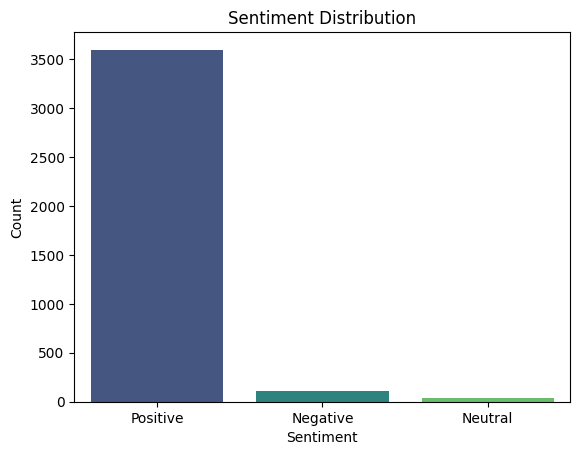

In [377]:
# Bar plot for sentiment counts
sns.countplot(data=df, x="Sentiment", palette="viridis")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [72]:
import langid

df["Language"] = df["Description"].apply(lambda text: langid.classify(text)[0])

In [78]:
df[df.Language != "en"].count()

Brand Name          220
Products            217
Description         220
Website             216
Sentiment_Scores    220
Compound            220
Sentiment           220
Language            220
dtype: int64

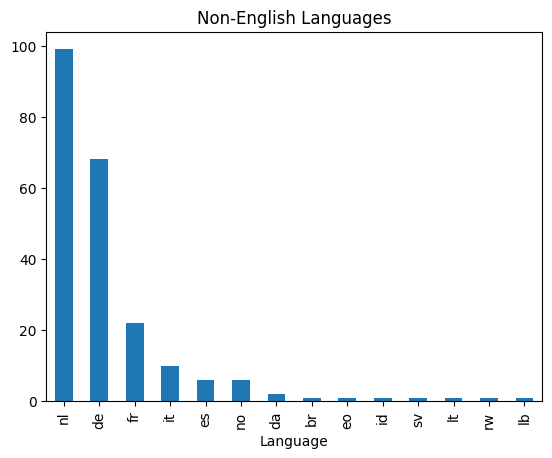

<Figure size 1000x800 with 0 Axes>

In [82]:
df[df.Language != "en"]["Language"].value_counts().plot(kind="bar")
plt.title("Non-English Languages")
plt.figure(figsize=(10, 8))
plt.show()

In [ ]:
df[(df.Language == "en") & (df.Sentiment == "Negative")]

,Brand Name,Products,Description,Website,Sentiment_Scores,Compound,Sentiment,Language
24,4th & Reckless,"[Footwear, Womenswear]",BRAND: 4th & Reckless DESCRIPTION: 4th & Reckl...,https://www.4thandreckless.com,"{'neg': 0.166, 'neu': 0.755, 'pos': 0.079, 'co...",-0.6908,Negative,en
26,66°North,"[Womenswear, Menswear]",BRAND: 66°North DESCRIPTION: 66°North was foun...,https://66north.com,"{'neg': 0.095, 'neu': 0.856, 'pos': 0.049, 'co...",-0.6590,Negative,en
27,66°North,"[Womenswear, Menswear]",BRAND: 66°North DESCRIPTION: 66°North was foun...,https://66north.com,"{'neg': 0.095, 'neu': 0.856, 'pos': 0.049, 'co...",-0.6590,Negative,en
103,ALEXUS GE.,[Womenswear],BRAND: ALEXUS GE. DESCRIPTION: THIS IS GE IS A...,https://alexusge.com,"{'neg': 0.121, 'neu': 0.789, 'pos': 0.089, 'co...",-0.2342,Negative,en
776,Colorful Standard,"[Womenswear, Menswear]",BRAND: Colorful Standard DESCRIPTION: Colorful...,https://www.colorfulstandard.com,"{'neg': 0.067, 'neu': 0.869, 'pos': 0.064, 'co...",-0.0896,Negative,en
843,Criminal Damage,"[Womenswear, Menswear, Kidswear, Accessories]",BRAND: Criminal Damage DESCRIPTION: Founded in...,https://www.criminaldamage.co.uk,"{'neg': 0.175, 'neu': 0.737, 'pos': 0.088, 'co...",-0.9350,Negative,en
853,Cup of Joe Denim,"[Womenswear, Menswear]",BRAND: Cup of Joe Denim DESCRIPTION: Why would...,https://www.cojdenim.com,"{'neg': 0.06, 'neu': 0.894, 'pos': 0.047, 'com...",-0.4435,Negative,en
1250,Franceschetti,[Footwear],BRAND: Franceschetti DESCRIPTION: In the early...,https://www.franceschetti.it,"{'neg': 0.045, 'neu': 0.919, 'pos': 0.036, 'co...",-0.4939,Negative,en
1356,G.I.G.A. DX,"[Womenswear, Menswear, Sportswear, Kidswear]",BRAND: G.I.G.A. DX DESCRIPTION: GIGA DX is par...,https://www.killtec.de,"{'neg': 0.321, 'neu': 0.593, 'pos': 0.086, 'co...",-0.9504,Negative,en
1616,INASKA,"[Womenswear, Swimwear]",BRAND: INASKA DESCRIPTION: We are a team of th...,https://www.inaska-swimwear.com,"{'neg': 0.126, 'neu': 0.812, 'pos': 0.061, 'co...",-0.7480,Negative,en


In [399]:
df[df["Brand Name"] == "OBEY"]

array(['BRAND: OBEY DESCRIPTION: The OBEY sticker campaign can be explained as an experiment in Phenomenology. Heidegger describes Phenomenology as “the process of letting things manifest themselves.” Phenomenology attempts to enable people to see clearly something that is right before their eyes but obscured; things that are so taken for granted that they are muted by abstract observation. Because people are not used to seeing advertisements or propaganda for which the product or motive is not obvious, frequent and novel encounters with the sticker provoke thought and possible frustration, nevertheless revitalizing the viewer’s perception and attention to detail. The sticker has no meaning but exists only to cause people to react, to contemplate and search for meaning in the sticker. Because OBEY has no actual meaning, the various reactions and interpretations of those who view it reflect their personality and the nature of their sensibilities. Many people who are familiar with the st

In [87]:
def_english = df[df.Language == "en"]


## Export Datasets

In [105]:
def_english = def_english.drop_duplicates(subset=['Brand Name'])
df = df.drop_duplicates(subset=['Brand Name'])

In [109]:
def_english.to_csv("data/EnglishScrapedData.csv", index=False)

In [110]:
df.to_csv("data/completeData.csv", index=False)